
# Confusion matrix


Example of confusion matrix usage to evaluate the quality
of the output of a classifier on the iris data set. The
diagonal elements represent the number of points for which
the predicted label is equal to the true label, while
off-diagonal elements are those that are mislabeled by the
classifier. The higher the diagonal values of the confusion
matrix the better, indicating many correct predictions.

The figures show the confusion matrix with and without
normalization by class support size (number of elements
in each class). This kind of normalization can be
interesting in case of class imbalance to have a more
visual interpretation of which class is being misclassified.

Here the results are not as good as they could be as our
choice for the regularization parameter C was not the best.
In real life applications this parameter is usually chosen
using :ref:`grid_search`.



In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Import the `RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
directory = 'UCI HAR Dataset/train/X_train.txt'
sub_dir = 'UCI HAR Dataset/train/subject_train.txt'
y_dir = 'UCI HAR Dataset/train/y_train.txt'
train = np.loadtxt(directory)
train_subject = np.loadtxt(sub_dir)
train_y = np.loadtxt(y_dir)

In [5]:
directory = 'UCI HAR Dataset/test/X_test.txt'
sub_dir = 'UCI HAR Dataset/test/subject_test.txt'
y_dir = 'UCI HAR Dataset/test/y_test.txt'
test = np.loadtxt(directory)
test_subject = np.loadtxt(sub_dir)
test_y = np.loadtxt(y_dir)

In [6]:
forest = RandomForestClassifier(max_depth = 10, min_samples_split=5, n_estimators = 100, random_state = 1)
reduced_train = train[:,[52, 202, 559, 516,69]]
my_reduced_forest = forest.fit(reduced_train, train_y)
reduced_test = test[:,[52, 202, 559, 516,69]]
my_reduced_forest.score(reduced_test, test_y)

0.84289107567017307

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[446  40  10   0   0   0]
 [ 62 379  30   0   0   0]
 [ 60  53 307   0   0   0]
 [  0   2   0 385 104   0]
 [  0   0   0 102 430   0]
 [  0   0   0   0   0 537]]


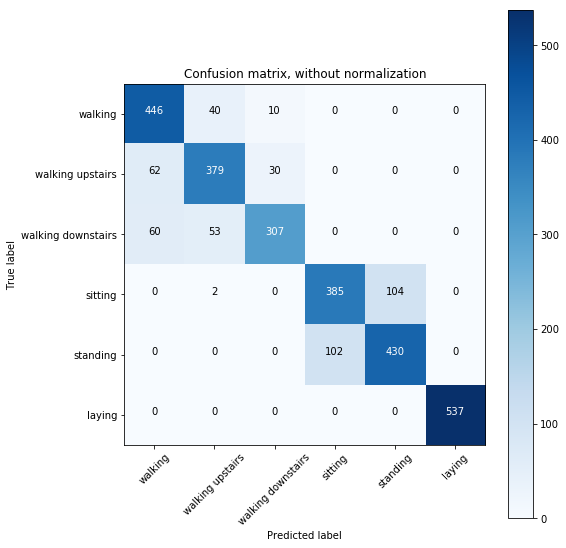

In [9]:
print(__doc__)

import itertools
from sklearn.metrics import confusion_matrix

# import some data to play with
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target
class_names = ["walking","walking upstairs", "walking downstairs", "sitting", "standing", "laying"]
y_pred = forest.predict(reduced_test)
# Split the data into a training set and a test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
#classifier = svm.SVC(kernel='linear', C=0.01)
#y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_y, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
#plt.figure(figsize=(8,8))
#plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      #title='Normalized confusion matrix')

plt.show()